# Assignment 2 Brief 

## Deadline: Tuesday, December 3, 2019 at 14:00 hrs

## Number of marks available: 20

## Scope: Sessions 6 to 9

## 1. Instructions
### How and what to submit

A. Submit a Jupyter Notebook named COM4509-6509_Assignment_2_UCard_XXXXXXXXX.ipynb where XXXXXXXXX refers to your UCard number.

B. Upload the notebook file to MOLE before the deadline above.

C. **NO DATA UPLOAD**: Please do not upload the data files used. We have a copy already. 


### Assessment Criteria 

* Being able to manipulate a dataset by generating sythetic data and extracting a particular subset. 

* Being able to build and train different machine learning models with tunable hyperparameters to optimise given evaluation metric.

* Being able to compare different machine learning models and explain interesting results observed. 

* Being able to follow examples in the lab and write code without the help of starter code.


### Late submissions

We follow Department's guidelines about late submissions, i.e., a deduction of 5% of the mark each working day the work is late after the deadline. NO late submission will be marked one week after the deadline because we will release a solution by then. Please read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/assessment/late-submission?pli=1&authuser=1). 

### Use of unfair means 

**"Any form of unfair means is treated as a serious academic offence and action may be taken under the Discipline Regulations."** (from the MSc Handbook). Please carefully read [this link](https://sites.google.com/sheffield.ac.uk/compgtstudenthandbook/menu/referencing-unfair-means?pli=1&authuser=1) on what constitutes Unfair Means if not sure.

# 2. Image classification and denoising

### The CIFAR-10 dataset
In this assignment, we will work on the [**CIFAR-10 dataset**](https://www.cs.toronto.edu/~kriz/cifar.html) collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton from the University of Toronto.  This dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. Each image is a 3-channel colour images of 32x32 pixels in size. There are 50000 training images and 10000 test images. 

			
### Question 1: Data loading and manipulation (4 marks)

1a. **Download** both the training and test data of the CIFAR-10 dataset, e.g., by following the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html). You can also download via other ways if you prefer.

1b. **Add random noise** to all training and test data to generate noisy dataset, e.g., by `torch.randn()`, with a scaling  factor `scale`, e.g., original image `+ scale * torch.randn()`, and **normalise/standardise** the pixel values to the **original range**, e.g.,  using `np.clip()`. You may choose any `scale` value between 0.2 and 0.5. 

**Note: Before generating the random noise, you MUST set the random seed to your UCard number XXXXXXXXX for reproducibility, e.g., using `torch.manual_seed()`. This seed needs to be used for all remaining code if there is randomness, for reproducibility.**

1c. **Extract a subset** with only two classes: **Cat** and **Dog** and name it starting with **CatDog**.        

1d. Show 10 pairs of original and noisy images of cats and 10 pairs of original and noisy images of dogs.

#### Question 1 Answer

In [1]:
# Write the code for your answer here. You can use multiple cells to improve readability.
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

from torch.autograd import Variable
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.preprocessing import StandardScaler

In [94]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


def make_mask(data, labels = [3,5]):
    mask = [True if data[i][1] in labels else False for i in range(len(data))]
    mask = torch.tensor(mask)
    return YourSampler(mask, data)

class YourSampler(torch.utils.data.sampler.Sampler):
    def __init__(self, mask, data_source):
        self.mask = mask
        self.data_source = data_source

    def __iter__(self):
        return iter([i.item() for i in torch.nonzero(self.mask)])

    def __len__(self):
        return len(self.data_source)

In [95]:


BATCH_SIZE = 4

no_noise = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# transform = transforms.Compose(
#     [transforms.ToTensor()])

# """ ================= ALL DATA  ================="""
# trainset_n = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=noise)
# trainset_noise = torch.utils.data.DataLoader(trainset_n, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
# trainset_no = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=no_noise)
# trainset_no_noise = torch.utils.data.DataLoader(trainset_no, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

# testset_n = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=noise)
# testset_noise = torch.utils.data.DataLoader(testset_n, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
# testset_no = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=no_noise)
# testset_no_noise = torch.utils.data.DataLoader(testset_no, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)



# """ ================= CatDog ================="""
# train_cd = make_mask(trainset_n)
# CatDog_train_no_noise = torch.utils.data.DataLoader(trainset_n, batch_size=BATCH_SIZE, num_workers=2, sampler=train_cd)
# CatDog_train_noise = torch.utils.data.DataLoader(trainset_no, batch_size=BATCH_SIZE, num_workers=2, sampler=train_cd)

# test_cd = make_mask(testset_n)
# CatDog_test_no_noise = torch.utils.data.DataLoader(testset_n, batch_size=BATCH_SIZE, num_workers=2, sampler=test_cd)
# CatDog_test_noise = torch.utils.data.DataLoader(testset_no, batch_size=BATCH_SIZE, num_workers=2, sampler=test_cd)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=no_noise)
trainset_loader = torch.utils.data.DataLoader(trainset, batch_size=len(trainset), shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=no_noise)
testset_loader = torch.utils.data.DataLoader(testset, batch_size=len(testset), shuffle=True, num_workers=2)

print("Done")

Files already downloaded and verified
Files already downloaded and verified
Done


In [96]:
# dataiter = iter(trainset_no_noise)
# ims, v = dataiter.next()

# dataitern = iter(trainset_noise)
# imss, vs = dataitern.next()

# for imss, v in dataitern:
#     imss = np.clip(imss + 0.2 * torch.randn((32,32)) ,-1,1)


# imshow(torchvision.utils.make_grid(ims))
# imshow(torchvision.utils.make_grid(imss))

torch.manual_seed()

train_data, train_labels = next(iter(trainset_loader))
test_data, test_labels = next(iter(testset_loader))


# print(len(train_data),len(add_noise(train_data)),len(train_labels))
def add_noise(data, scale = 0.2):
    return np.clip(data + scale * torch.randn_like(data),-1,1)


train_all, train_noise_all, train_labels_all = train_data.numpy(), add_noise(train_data).numpy(), train_labels.numpy()
test_all, test_noise_all, test_labels_all = test_data.numpy(), add_noise(test_data).numpy(), test_labels.numpy()

================ Cats ================


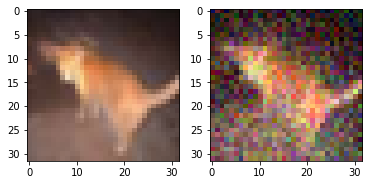

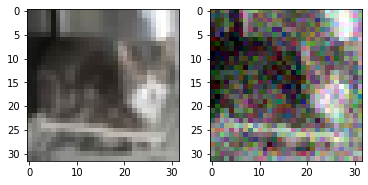

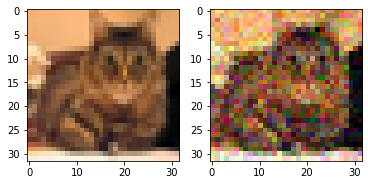

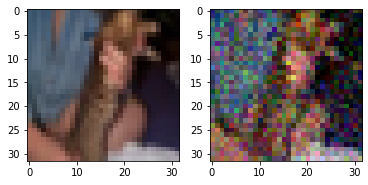

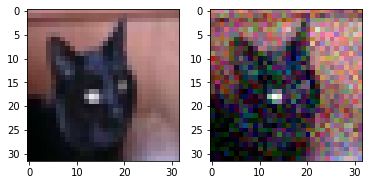

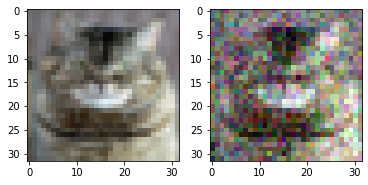

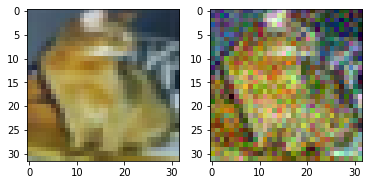

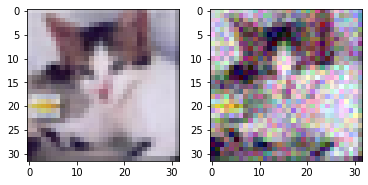

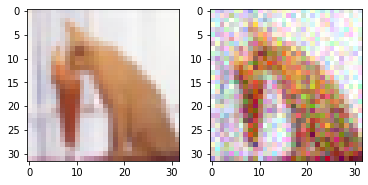

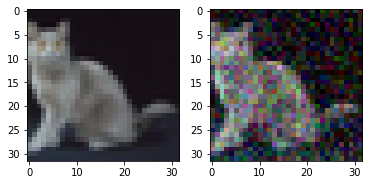

================ Dogs ================


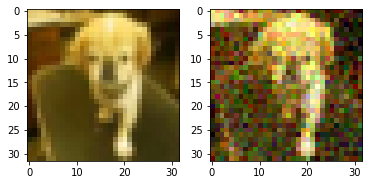

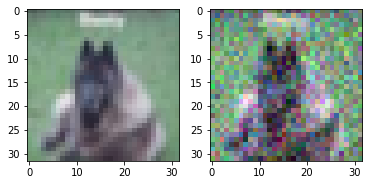

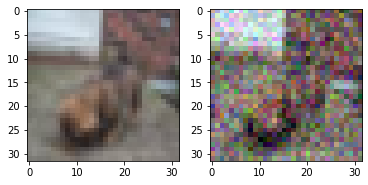

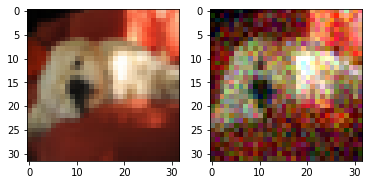

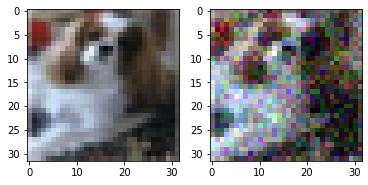

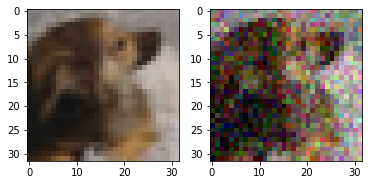

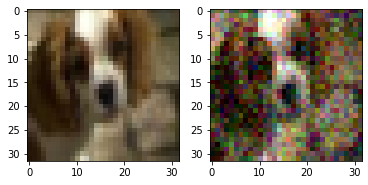

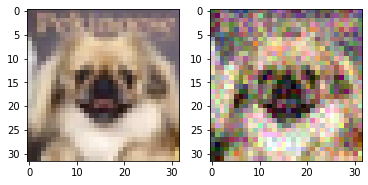

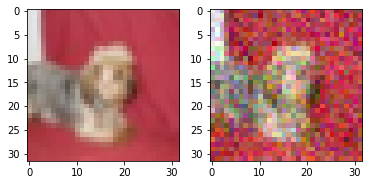

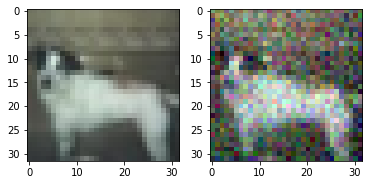

In [97]:

catDogs_train = [(x,y,z) for (x,y,z) in zip(train_all, train_noise_all, train_labels_all) if z == 3 or z == 5]
catDogs_test = [(x,y,z) for (x,y,z) in zip(test_all, test_noise_all, test_labels_all) if z == 3 or z == 5]

print("================ Cats ================")
for noise, no_noise,_ in [(x,y,z) for (x, y, z) in catDogs_train if z == 3][:10]:
    fig=plt.figure()
    fig.add_subplot(1,2,1)
    imshow(torchvision.utils.make_grid(torch.tensor(noise)))
    fig.add_subplot(1,2,2)
    imshow(torchvision.utils.make_grid(torch.tensor(no_noise)))
    plt.show()

print("================ Dogs ================")
for noise, no_noise,_ in [(x,y,z) for (x, y, z) in catDogs_train if z == 5][:10]:
    fig=plt.figure()
    fig.add_subplot(1,2,1)
    imshow(torchvision.utils.make_grid(torch.tensor(noise)))
    fig.add_subplot(1,2,2)
    imshow(torchvision.utils.make_grid(torch.tensor(no_noise)))
    plt.show()

# show(3)




### Question 2: Dimensionality reduction, binary classification, and evaluation (6 marks)

This question uses the **CatDog** subset **with no noise added**.

#### Training

2a. Apply PCA on the training set to reduce the dimensionality. You need to study **at least seven** different values for the reduced dimensionality. **Explain** your choice.

2b. Train **eight** Naive Bayes classifiers: one on the original features (raw pixels), and seven on the seven different PCA features in 2a. You will need to decide on what Naive Bayes classifier (Gaussian? Multinomial? etc.) to use and **explain** your choice.

#### Testing and evaluation
2c. Evalaute the eight Naive Bayes classifiers on the test set in terms of **classification accuracy** and **visualise** their performance using a bar graph.

2d. Plot the [ROC Curves](https://en.wikipedia.org/wiki/Receiver_operating_characteristic) in true positive rates vs false positive rates for the eight Naive Bayes classifiers in **one figure** using eight different line/marker styles clearly labelled. 

2e. Compute the [area under the ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_the_curve) values for the eight Naive Bayes classifiers and visualise using a bar graph.

2f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 


In [98]:
# Write the code for your answer here. You can use multiple cells to improve readability.
from sklearn.preprocessing import StandardScaler

def vect(X):
    return X.reshape((X.shape[0],-1))


train, train_noise, train_labels = map(np.array , zip(*catDogs_train))
test, test_noise, test_labels = map(np.array , zip(*catDogs_test))

train = vect(train)
test = vect(test)

train_noise = vect(train_noise)
test_noise = vect(test_noise)


In [99]:
pca = PCA(n_components = train.shape[1])

print(train.shape)
principalComponents = pca.fit_transform(train)


var = [0.4,0.5,0.6,0.7,0.8,0.9,0.99]

c = np.cumsum(pca.explained_variance_ratio_)

comp = []
for i in var:
    num = np.argmax(c >= i)
    comp.append((num + 1, c[num]))

(10000, 3072)


[3, 4, 8, 15, 32, 87, 561]
[0.4387159, 0.50074136, 0.6108192, 0.70858115, 0.8038023, 0.9004728, 0.9900085]
[(3, 0.4387159), (4, 0.50074136), (8, 0.6108192), (15, 0.70858115), (32, 0.8038023), (87, 0.9004728), (561, 0.9900085)]


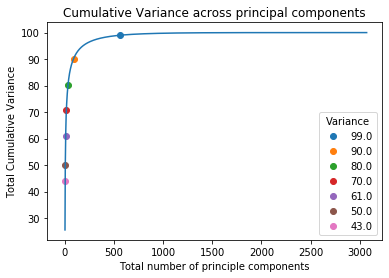

In [100]:
print([x for x,i in comp])
print([i for x,i in comp])
print(comp)
plt.title("Cumulative Variance across principal components")
plt.xlabel("Total number of principle components")
plt.ylabel("Total Cumulative Variance")
plt.plot(c * 100)
for x, y, label in zip([x for x,i in comp][::-1],[i * 100 for x,i in comp][::-1], [(i * 100)//1 for x,i in comp][::-1]):
    plt.scatter(x, y, label = label)
plt.legend(title="Variance")
plt.show()

## Choice of Components

I chose a spred of components that cover all the cumulative variance of the data. This can be seen in the figure above. This will be used to discover the optimum number of priniciple components to use for classification.  

In [101]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

import time

def Gclass(train, train_labels, test, test_labels, comp, chart, auc=None, a = [], aoc = [], t = [], conf = [], time_d={} ,accuracy={}):
    train = vect(train)
    test = vect(test)
    for c,v in comp:
        pca = PCA(n_components = c)
        train_principalComponents = pca.fit_transform(train)
        
        
        clf = GaussianNB()
        GaussianNB(priors=None)
        
        start = time.time()
        clf.fit(train_principalComponents, train_labels)
        end = time.time()
        total_train_time = end - start
        
        print(clf.class_prior_)
        test_principalComponents = pca.transform(test)
        
        start = time.time()
        pre = clf.predict(test_principalComponents)
        end = time.time()
        total_test_time = end - start
        t.append((total_train_time,total_test_time))
        
        conf.append(confusion_matrix(test_labels, pre))
        
        time_d["G " + str(c)] = {"Train":total_train_time,"Test":total_test_time}
        
        if auc:
            aoc.append(metrics.roc_auc_score(test_labels//5, pre))
            fpr, tpr, thresholds = metrics.roc_curve(test_labels // 5, pre)
            print(fpr, tpr, thresholds)
            a.append((fpr, tpr, c))
        acc = sum(clf.predict(test_principalComponents) == test_labels) / len(test_labels)
        accuracy["Gaussian " + str(c)] = acc
        chart.append(acc)
        print("Number of comps = ",c,"Total var = ",v,"acc = ", sum(clf.predict(test_principalComponents) == test_labels) / len(test_labels))
    
    print("="*20 + "raw"+ "="*20)
    
    clf = GaussianNB()
    GaussianNB(priors=None)
    
    start = time.time()
    clf.fit(train, train_labels)
    end = time.time()
    total_train_time = end - start
    
    start = time.time()
    pre = clf.predict(test)
    end = time.time()
    total_test_time = end - start
    
    t.append((total_train_time,total_test_time))
    conf.append(confusion_matrix(test_labels, pre))
    time_d["Gaussian Raw"] = {"Train":total_train_time,"Test":total_test_time}
    if auc:
        aoc.append(metrics.roc_auc_score(test_labels//5, pre))
        fpr, tpr, thresholds = metrics.roc_curve(test_labels // 5, pre)
        print(fpr, tpr, thresholds)
        a.append((fpr, tpr,"Raw"))
    acc = sum(clf.predict(test) == test_labels) / len(test_labels)
    accuracy["Gaussian Raw"] = acc
    chart.append(acc)
    print(sum(clf.predict(test) == test_labels) / len(test_labels))

## Choice of Gaussian or Multinomial?

Gaussian was chosen because the distrition of values are continous.

In [102]:
bar = []
a = []
aoc = []
Gclass(train, train_labels, test, test_labels, comp, bar, auc=True, a = a, aoc=aoc)

[0.5 0.5]
[0.    0.439 1.   ] [0.    0.571 1.   ] [6 5 3]
Number of comps =  3 Total var =  0.4387159 acc =  0.566
[0.5 0.5]
[0.    0.481 1.   ] [0.    0.628 1.   ] [6 5 3]
Number of comps =  4 Total var =  0.50074136 acc =  0.5735
[0.5 0.5]
[0.    0.474 1.   ] [0.    0.643 1.   ] [6 5 3]
Number of comps =  8 Total var =  0.6108192 acc =  0.5845
[0.5 0.5]
[0.    0.467 1.   ] [0.    0.636 1.   ] [6 5 3]
Number of comps =  15 Total var =  0.70858115 acc =  0.5845
[0.5 0.5]
[0.    0.362 1.   ] [0.    0.595 1.   ] [6 5 3]
Number of comps =  32 Total var =  0.8038023 acc =  0.6165
[0.5 0.5]
[0.    0.343 1.   ] [0.    0.532 1.   ] [6 5 3]
Number of comps =  87 Total var =  0.9004728 acc =  0.5945
[0.5 0.5]
[0.    0.314 1.   ] [0.    0.508 1.   ] [6 5 3]
Number of comps =  561 Total var =  0.9900085 acc =  0.597
====================raw====================
[0.    0.451 1.   ] [0.    0.638 1.   ] [6 5 3]
0.5935


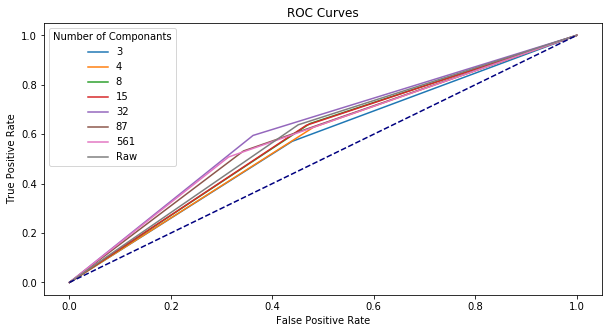

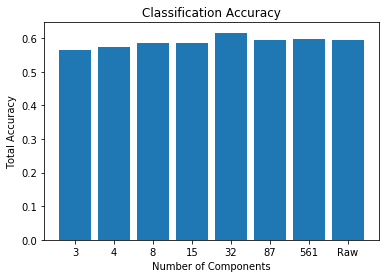

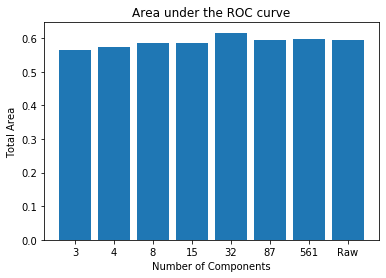

In [103]:
plt.figure(figsize=(10,5))
for i,x in enumerate(a):
    plt.plot(x[0],x[1], label=x[2])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.legend(title="Number of Componants")
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

x_pos = [i for i, _ in enumerate(bar)]
plt.bar(x = x_pos, height = bar)
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Classification Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Total Accuracy')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(aoc)]
plt.bar(x = x_pos, height = aoc)
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Area under the ROC curve')
plt.xlabel('Number of Components')
plt.ylabel('Total Area')
plt.xticks(x_pos, c)
plt.show()




## Interesting Observations

Firstly, in terms of classification accuracy the lower the amount of Principle Components the lower the total accuracy of the classifier. This is do to the fact that most of the data's varience is removed. However, 32 components perfomed best. Even better than when all the dimensions were present. This suggests that 32 components best represets the differences between cats and dogs.

Secondly, the ROC curves show that 32 components produce the best true positive results vs. false positives. Suggesting that 32 components have the best probability of classifiing correctly.

Lasty, the AUC chart shows that again 32 components produced the best result.

### Question 3: Noisy data and multiclass classification (6 marks)

#### Noisy **CatDog** subset.

3a. Repeat 2a, 2b, and 2c on the noisy version of CatDog subset. Show the bar graph and compare it with that in 2c above. 

#### Multiclass classification using the original CIFAR-10 dataset (all 10 classes)

3b. Apply PCA on the training set to reduce the dimensionality. You need to study at least **three** different values for the reduced dimensionality. Explain your choice.

3c. Train nine classifers: **four Naive Bayes** classifiers(one on the original features, and three on the three different PCA features in 3b); **four Logistic Regression** classifiers (one on the original features, and three on the three different PCA features in 3b); and one **Convoluational Neural Network** as defined in the [pytorch CIFAR10 tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

3d. Evalaute the nine classifiers on the test set. Summarise the **classification accuracy**, **total training time**, and **total test time** using three bar graphs.

3e. Show the confusion matrix for these nine classifiers (see Lab 8 - 1.4).

3f. Describe **at least three** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

(10000, 3072)
[(4, 0.43201095), (7, 0.5070034), (14, 0.6054089), (33, 0.70012695), (109, 0.8005451), (645, 0.90001917), (1383, 0.9500142)]


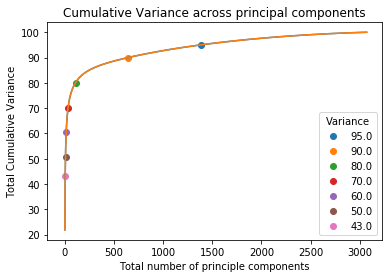

In [104]:
# Write the code for your answer here. You can use multiple cells to improve readability.
pca = PCA(n_components = train_noise.shape[1])

print(train_noise.shape)
principalComponents = pca.fit_transform(train_noise)

plt.plot(np.cumsum(pca.explained_variance_ratio_*100))

var = [0.4,0.5,0.6,0.7,0.8,0.9,0.95]
c = np.cumsum(pca.explained_variance_ratio_)
comp = []
for i in var:
    num = np.argmax(c >= i)
    comp.append((num + 1, c[num]))

print(comp)
plt.title("Cumulative Variance across principal components")
plt.xlabel("Total number of principle components")
plt.ylabel("Total Cumulative Variance")
plt.plot(c * 100)
for x, y, label in zip([x for x,i in comp][::-1],[i * 100 for x,i in comp][::-1], [(i * 100)//1 for x,i in comp][::-1]):
    plt.scatter(x, y, label = label)
plt.legend(title="Variance")
plt.show()

## Choice of Components

I chose a spred of components that cover all the cumulative variance of the data. This can be seen in the figure above. This will be used to discover the optimum number of priniciple components to use for classification.  

## Choice of Gaussian or Multinomial?

Gaussian was chosen because the distrition of values are continous.

In [105]:
bar = []

print(test_noise.shape)
Gclass(train_noise, train_labels, test_noise, test_labels, comp, bar, auc=True)

(2000, 3072)
[0.5 0.5]
[0.    0.465 1.   ] [0.    0.611 1.   ] [6 5 3]
Number of comps =  4 Total var =  0.43201095 acc =  0.573
[0.5 0.5]
[0.    0.466 1.   ] [0.    0.645 1.   ] [6 5 3]
Number of comps =  7 Total var =  0.5070034 acc =  0.5895
[0.5 0.5]
[0.   0.45 1.  ] [0.    0.629 1.   ] [6 5 3]
Number of comps =  14 Total var =  0.6054089 acc =  0.5895
[0.5 0.5]
[0.    0.351 1.   ] [0.    0.594 1.   ] [6 5 3]
Number of comps =  33 Total var =  0.70012695 acc =  0.6215
[0.5 0.5]
[0.    0.348 1.   ] [0.    0.505 1.   ] [6 5 3]
Number of comps =  109 Total var =  0.8005451 acc =  0.5785
[0.5 0.5]
[0.   0.27 1.  ] [0.    0.395 1.   ] [6 5 3]
Number of comps =  645 Total var =  0.90001917 acc =  0.5625
[0.5 0.5]
[0.    0.241 1.   ] [0.    0.348 1.   ] [6 5 3]
Number of comps =  1383 Total var =  0.9500142 acc =  0.5535
====================raw====================
[0.    0.446 1.   ] [0.    0.627 1.   ] [6 5 3]
0.5905


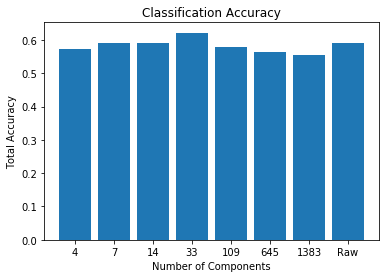

In [106]:
x_pos = [i for i, _ in enumerate(bar)]
plt.bar(x = x_pos, height = bar)
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Classification Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Total Accuracy')
plt.xticks(x_pos, c)
plt.show()

In [107]:
# PART 3b
train_all = vect(train_all)
test_all = vect(test_all)

In [108]:
pca = PCA(n_components = train_all.shape[1])

print(train_all.shape)
principalComponents = pca.fit_transform(train_all)

(50000, 3072)


[(4, 0.50700647), (21, 0.7504905), (658, 0.99000657)]


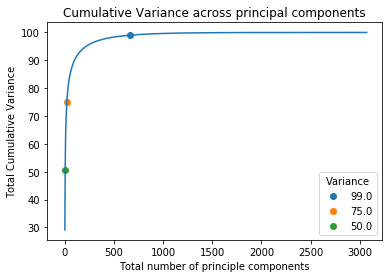

In [109]:
var = [0.5,0.75,0.99]
c = np.cumsum(pca.explained_variance_ratio_)
comp = []
for i in var:
    num = np.argmax(c >= i)
    comp.append((num + 1, c[num]))

print(comp)
plt.title("Cumulative Variance across principal components")
plt.xlabel("Total number of principle components")
plt.ylabel("Total Cumulative Variance")
plt.plot(c * 100)
for x, y, label in zip([x for x,i in comp][::-1],[i * 100 for x,i in comp][::-1], [(i * 100)//1 for x,i in comp][::-1]):
    plt.scatter(x, y, label = label)
plt.legend(title="Variance")
plt.show()

## Choice of Components

I chose a spred of components that cover all the cumulative variance of the data. This can be seen in the figure above. This will be used to discover the optimum number of priniciple components to use for classification.  

In [110]:
# PART 3c
bar = []
t = []
confusion = []

time_d = {}
accuracy = {}

Gclass(train_all, train_labels_all, test_all, test_labels_all, comp, bar, t = t, conf = confusion,time_d=time_d,accuracy= accuracy)
print(t)

[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Number of comps =  4 Total var =  0.50700647 acc =  0.2697
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Number of comps =  21 Total var =  0.7504905 acc =  0.3671
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
Number of comps =  658 Total var =  0.99000657 acc =  0.2936
====================raw====================
0.2976
[(0.01452326774597168, 0.015187263488769531), (0.025087833404541016, 0.03246593475341797), (0.2878708839416504, 0.4630410671234131), (1.4149010181427002, 3.855468988418579)]


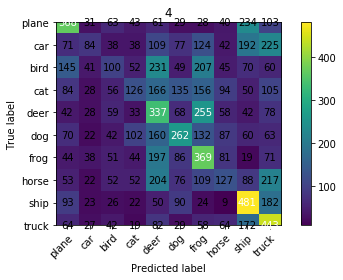

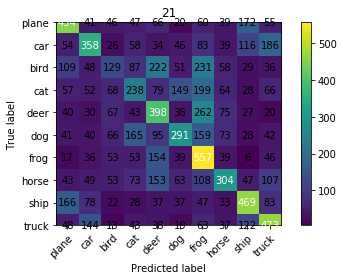

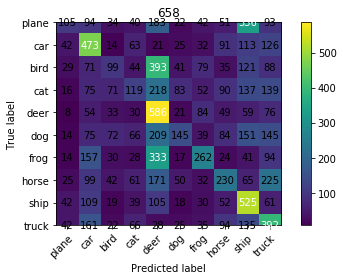

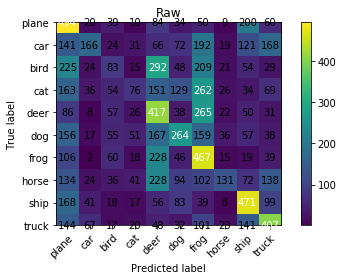

In [111]:
c,_ = map(list , zip(*comp))
c.append("Raw")
for i, (x, c) in enumerate(zip(confusion,c)):
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    fig, ax = plt.subplots()
    im = ax.imshow(x, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(x.shape[1]),
           yticks=np.arange(x.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=c,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = x.max() / 2.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ax.text(j, i, format(x[i, j], fmt),
                    ha="center", va="center",
                    color="white" if x[i, j] > thresh else "black")
    fig.tight_layout()
plt.show()



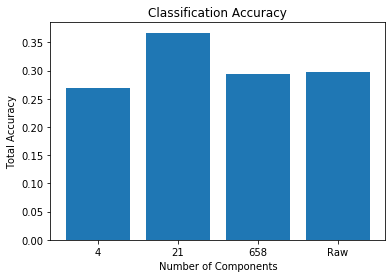

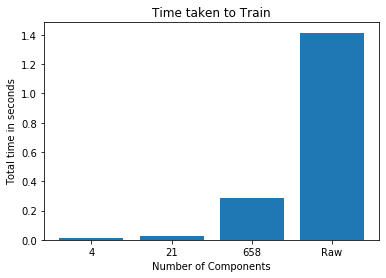

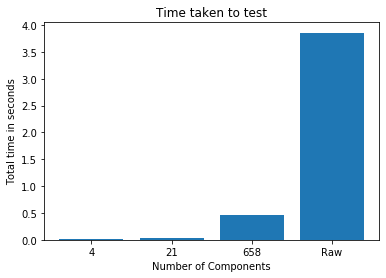

In [112]:
x_pos = [i for i, _ in enumerate(bar)]
plt.bar(x = x_pos, height = bar)
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Classification Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Total Accuracy')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for i, _ in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to Train')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for _, i in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to test')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

In [113]:
from sklearn.linear_model import LogisticRegression

bar = []
t = []
conf = []

for c,i in comp:
    pca = PCA(n_components = c)
    
    train_principalComponents = pca.fit_transform(train_all)
    test_principalComponents = pca.transform(test_all)
    clf = LogisticRegression(multi_class='multinomial',solver='lbfgs')
    
    start = time.time()
    clf.fit(train_principalComponents, train_labels_all)
    end = time.time()

    total_train_time = end - start
    
    start = time.time()
    pre = clf.predict(test_principalComponents)
    end = time.time()
    total_test_time = end - start
   
    t.append((total_train_time, total_test_time))
    
    conf.append(confusion_matrix(test_labels_all, pre))
    time_d["LogisticRegression " + str(c)] = {"Train":total_train_time,"Test":total_test_time}
    acc = sum(pre == test_labels_all)/len(test_labels_all)
    accuracy["LogisticRegression " + str(c)] = acc
    print(acc)
    bar.append(acc)
    
clf = LogisticRegression(multi_class='multinomial',solver='lbfgs')
clf.fit(train_all, train_labels_all)
pre = clf.predict(test_all)
conf.append(confusion_matrix(test_labels_all, pre))
time_d["LogisticRegression Raw"] = {"Train":total_train_time,"Test":total_test_time}
acc = sum(pre == test_labels_all)/len(test_labels_all)
accuracy["LogisticRegression raw"] = acc
print(acc)
bar.append(acc)


    

0.2508
0.3672


/Users/Jake/Documents/University/ComputerScience/YearFour/machine/mEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.4054


/Users/Jake/Documents/University/ComputerScience/YearFour/machine/mEnv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.399


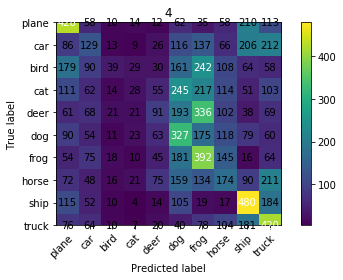

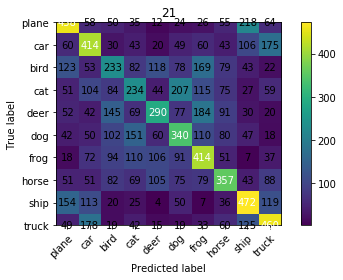

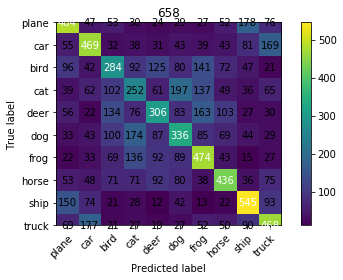

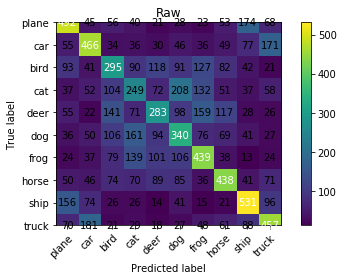

In [114]:
c,_ = map(list , zip(*comp))
c.append("Raw")
for i, (x, c) in enumerate(zip(conf,c)):
    classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
    fig, ax = plt.subplots()
    im = ax.imshow(x, interpolation='nearest')
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...

    ax.set(xticks=np.arange(x.shape[1]),
           yticks=np.arange(x.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=c,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = x.max() / 2.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            ax.text(j, i, format(x[i, j], fmt),
                    ha="center", va="center",
                    color="white" if x[i, j] > thresh else "black")
    fig.tight_layout()
plt.show()

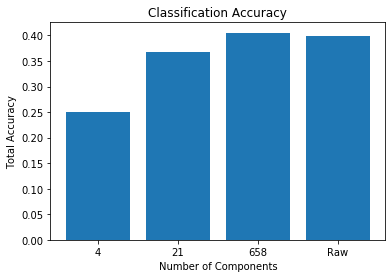

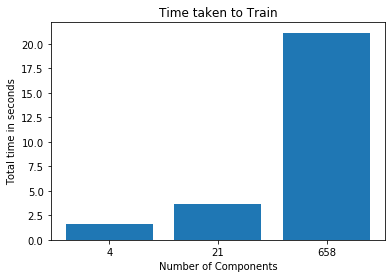

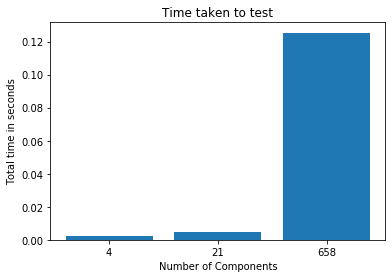

In [115]:
x_pos = [i for i, _ in enumerate(bar)]
plt.bar(x = x_pos, height = bar)
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Classification Accuracy')
plt.xlabel('Number of Components')
plt.ylabel('Total Accuracy')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for i, _ in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to Train')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for _, i in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to test')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

In [116]:
import torch.nn as nn
import torch.nn.functional as F
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

t = []

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

start = time.time()
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
end = time.time()
total_train_time = end - start

print('Finished Training')

[1,  2000] loss: 2.195
[1,  4000] loss: 1.900
[1,  6000] loss: 1.663
[1,  8000] loss: 1.563


KeyboardInterrupt: 

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [ ]:
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
net.load_state_dict(torch.load(PATH))

start = time.time()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
end = time.time()
total_test_time = end - start
t.append((total_train_time,total_test_time))
time_d["CNN"] = {"Train":total_train_time,"Test":total_test_time}

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
accuracy["CNN"] = correct / total
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for i, _ in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to Train')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

x_pos = [i for i, _ in enumerate(t)]
plt.bar(x = x_pos, height = [i for _, i in (t)])
c,_ = map(list , zip(*comp))
c.append("Raw")
plt.title('Time taken to test')
plt.xlabel('Number of Components')
plt.ylabel('Total time in seconds')
plt.xticks(x_pos, c)
plt.show()

In [ ]:

x_pos = [i for i, _ in enumerate(time_d)]
plt.title("Total Train Time in Seconds")
plt.ylabel("Time in seconds")
plt.xlabel("Classifier")
plt.bar(x = x_pos, height = [i.get("Train") for _, i in time_d.items()])
plt.xticks(x_pos, [x for x, i in time_d.items()], rotation=90)
plt.show()

plt.title("Total Test Time in Seconds")
plt.ylabel("Time in seconds")
plt.xlabel("Classifier")
plt.bar(x = x_pos, height = [i.get("Test") for _, i in time_d.items()])
plt.xticks(x_pos, [x for x, i in time_d.items()], rotation=90)
plt.show()

x_pos = [i for i, _ in enumerate(accuracy)]
plt.title("Total Classifier Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Classifier")
plt.bar(x = x_pos, height = [i for _, i in accuracy.items()])
plt.xticks(x_pos, [x for x, i in accuracy.items()], rotation=90)
plt.show()

### Question 4: Denoising Autoencoder (4 marks)

This question uses both the original and noisy CIFAR-10 datasets (all 10 classes).

Read about denoising autoencoder at [Wikepedia](https://en.wikipedia.org/wiki/Autoencoder#Denoising_autoencoder_(DAE)) and this [short introduction](https://towardsdatascience.com/denoising-autoencoders-explained-dbb82467fc2) or any other sources you like.

4a. Modify the autoencoder architecture in Lab 7 so that it takes colour images as input (i.e., 3 input channels). 

4b. **Training**: feed the **noisy training images** as input to the autoencoder in 4a; use a loss function that computes the reconstruction error between the **output of the autoencoder** and the respective **original images**.

4c. **Testing**: evaluate the autoencoder trained in 4b on the test datasets (feed noisy images in and compute reconstruction errors on original clean images. Find the **worstly denoised** 30 images (those with the largest reconstruction errors) in the test set and show them in pairs with the original images (60 images to show in total).

4d. Choose at least two hyperparameters to vary. Study **at least three different choices** for each hyperparameter. When varying one hyperparameter, all the other hyperparameters can be fixed. Visualise the performance sensitivity with respect to these hyperparameters.

4e. Describe **at least two** interesting observations from the evaluation results above. Each observation should have **3-5 sentences**. 

In [135]:
# Write the code for your answer here. You can use multiple cells to improve readability.


class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            # 1 input image channel, 16 output channel, 3x3 square convolution
            nn.Conv2d(3, 32, 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv2d(32, 64, 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.Tanh(),
            nn.Conv2d(128, 256, 3)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(256, 128, 3),
            nn.Tanh(),
            nn.ConvTranspose2d(128, 64, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh(),
            nn.ConvTranspose2d(64, 32, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh(),
            nn.ConvTranspose2d(32, 3, 3, stride=2, padding=1, output_padding=1),
            nn.Tanh()  #to range [0, 1]
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [136]:
myAE=Autoencoder()
print(myAE)
params = list(myAE.parameters())
print(len(params))
print(params[0].size())  # First Conv2d's .weight
print(params[1].size())  # First Conv2d's .bias
print(params[1])
trainset = None
trainset_loader = None

testset = None
testset_loader = None

def imshow(img):
    img = img / 2 + 0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
class Noise(object):
    def __call__(self, sample):
        sample += torch.randn_like(sample) * 0.2
        sample = np.clip(sample, -1, 1)
        return sample

no_noise = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

noise = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    Noise()])
#Hyperparameters for training

batch_size = 64
learning_rate = 0.1
max_epochs = 20

criterion = nn.MSELoss() 

optimizer = torch.optim.SGD(myAE.parameters(), lr=learning_rate, weight_decay=1e-5,momentum=0.9)

trainset_noise = torchvision.datasets.CIFAR10(root='./data', train=True, transform=noise)
trainset_loader_noise = torch.utils.data.DataLoader(trainset_noise, batch_size=batch_size, shuffle=False)#Storage
trainset_no_noise = torchvision.datasets.CIFAR10(root='./data', train=True, transform=no_noise)
trainset_loader_no_noise = torch.utils.data.DataLoader(trainset_no_noise, batch_size=batch_size, shuffle=False)#Storage

outputs = []
#Start training
for epoch in range(max_epochs):
    i = 0
    for (data_noise, _), (data_no_noise, _) in zip(trainset_loader_noise, trainset_loader_no_noise):
        optimizer.zero_grad()
        
        recon = myAE(data_noise)
        imshow(torchvision.utils.make_grid(data_noise))
        loss = criterion(recon, data_no_noise)
        loss.backward()
        optimizer.step()
    if (epoch % 1) == 0:
        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        
    outputs.append((epoch, data_noise, recon),)
# PATH = './cifar_net_auto.pth'
# torch.save(myAE.state_dict(), PATH)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): Tanh()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): Tanh()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): Tanh()
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): Tanh()
    (2): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): Tanh()
    (4): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (5): Tanh()
    (6): ConvTranspose2d(32, 3, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (7): Tanh()
  )
)
16
torch.Size([32, 3, 3, 3])
torch.Size([32])
Parameter containing:
tensor([-0.0537,  0.0869, -0.1172,  0.0256, -0.1427,  0.1198,  0.0577,

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11afab680> (for post_execute):


KeyboardInterrupt: 

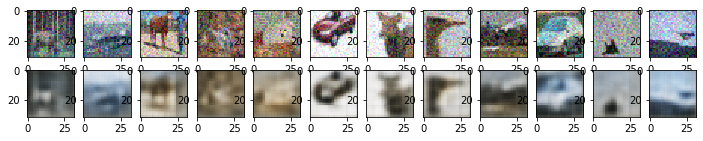

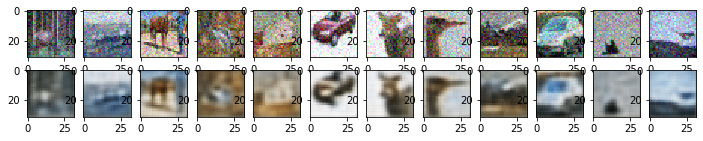

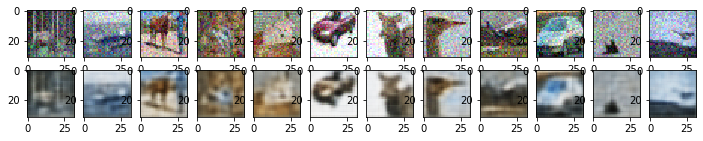

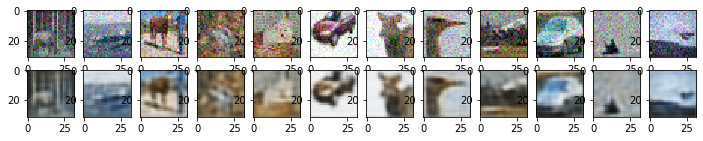

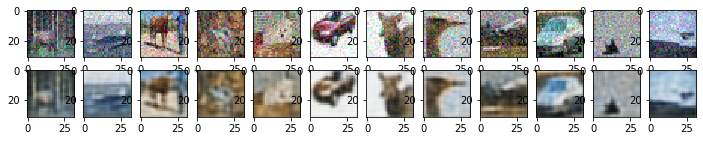

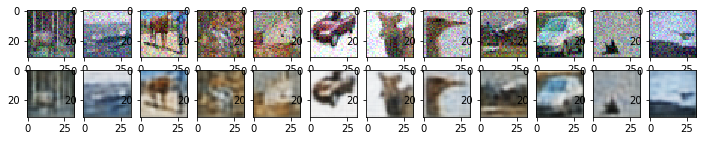

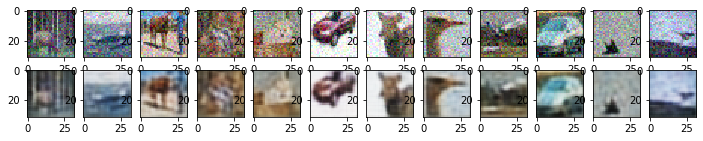

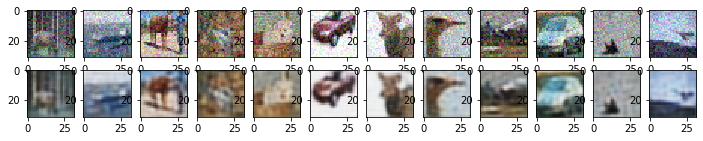

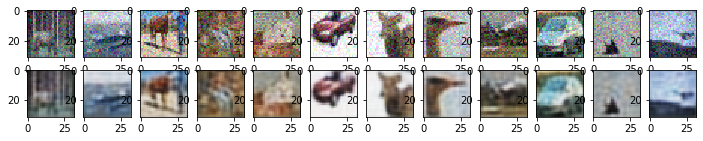

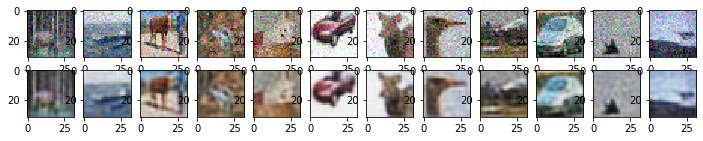

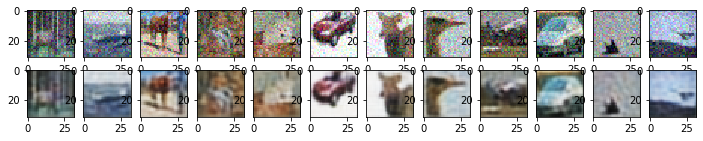

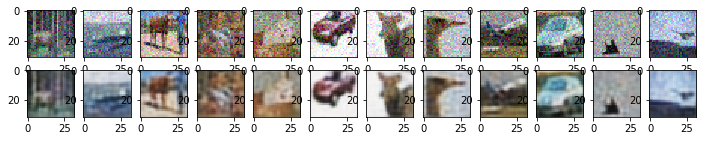

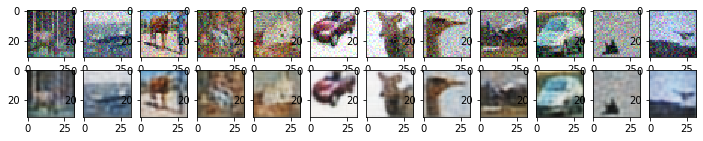

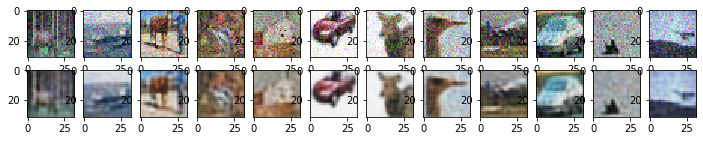

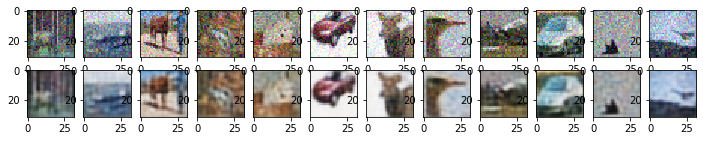

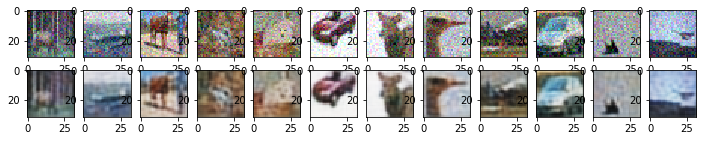

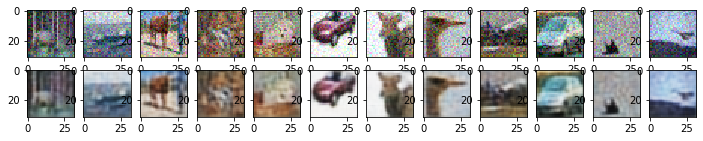

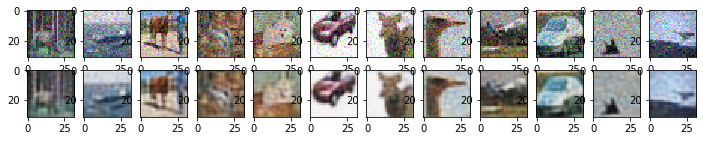

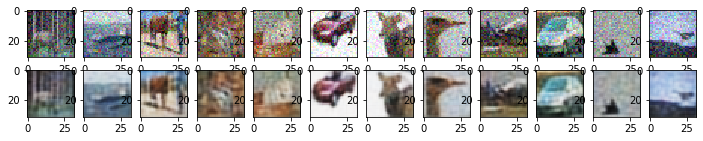

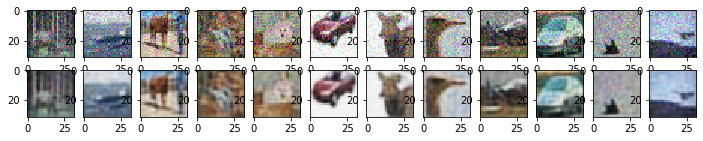

In [139]:
def imshow(img):
    img = img/2 + 0.5    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

for k in range(0, max_epochs):
    plt.figure(figsize=(numImgs, 2))
    imgs = outputs[k][1].detach().numpy()    
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= numImgs: break
        plt.subplot(2, numImgs, i+1)
        imshow(torchvision.utils.make_grid(torch.Tensor(item)))
        
    for i, item in enumerate(recon):
        if i >= numImgs: break
        plt.subplot(2, numImgs, numImgs+i+1)
        imshow(torchvision.utils.make_grid(torch.Tensor(item)))

In [140]:
myAE.load_state_dict(torch.load(PATH))

testset_noise = torchvision.datasets.CIFAR10(root='./data', train=False, transform=noise)
testset_loader_noise = torch.utils.data.DataLoader(testset_noise, batch_size=1, shuffle=False)#Storage
testset_no_noise = torchvision.datasets.CIFAR10(root='./data', train=False, transform=no_noise)
testset_loader_no_noise = torch.utils.data.DataLoader(testset_no_noise, batch_size=1, shuffle=False)

arr = []

with torch.no_grad():
    for (test, _), (test_no, _) in zip(testset_loader_noise, testset_loader_no_noise):
        recon = myAE(test)
        loss = criterion(recon, test_no)
        arr.append((loss.detach(),recon.detach(), test.detach()))
#         print(loss)
#         plt.subplot(131)
#         imshow(torchvision.utils.make_grid(test))
#         plt.subplot(132)
#         imshow(torchvision.utils.make_grid(recon))
#         plt.subplot(133)
#         imshow(torchvision.utils.make_grid(test_no))
#         plt.show()



[tensor(0.0592), tensor(0.0592), tensor(0.0584), tensor(0.0561), tensor(0.0542), tensor(0.0517), tensor(0.0494), tensor(0.0479), tensor(0.0473), tensor(0.0469), tensor(0.0466), tensor(0.0465), tensor(0.0463), tensor(0.0462), tensor(0.0461), tensor(0.0459), tensor(0.0454), tensor(0.0451), tensor(0.0441), tensor(0.0437), tensor(0.0432), tensor(0.0425), tensor(0.0423), tensor(0.0422), tensor(0.0414), tensor(0.0412), tensor(0.0410), tensor(0.0409), tensor(0.0409), tensor(0.0404)]
tensor(0.0592)


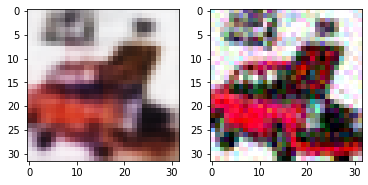

tensor(0.0592)


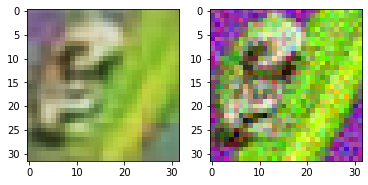

tensor(0.0584)


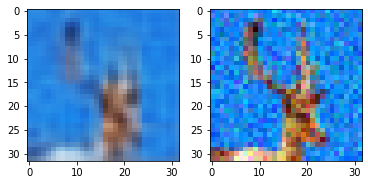

tensor(0.0561)


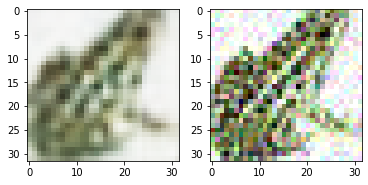

tensor(0.0542)


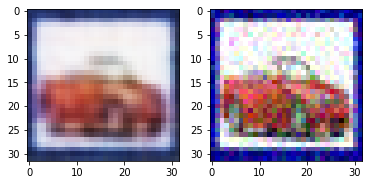

tensor(0.0517)


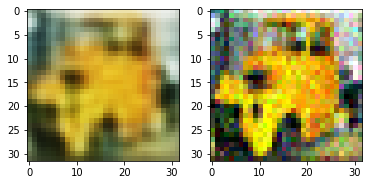

tensor(0.0494)


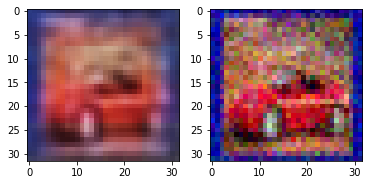

tensor(0.0479)


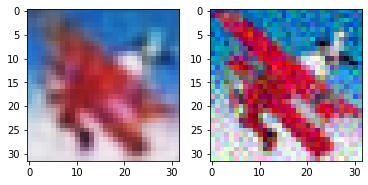

tensor(0.0473)


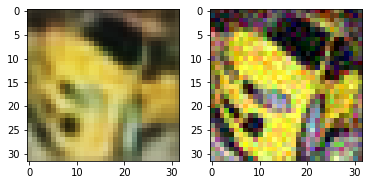

tensor(0.0469)


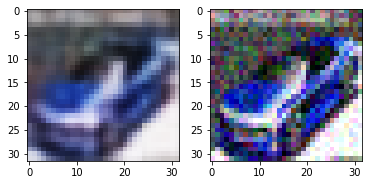

tensor(0.0466)


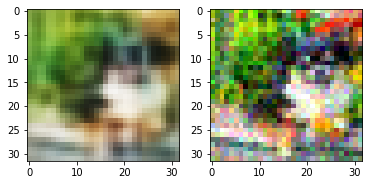

tensor(0.0465)


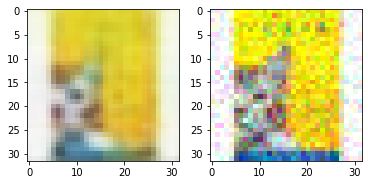

tensor(0.0463)


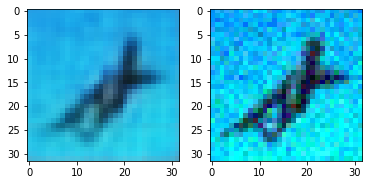

tensor(0.0462)


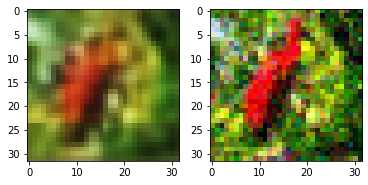

tensor(0.0461)


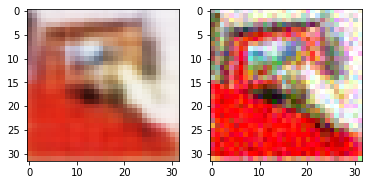

tensor(0.0459)


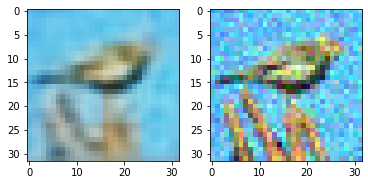

tensor(0.0454)


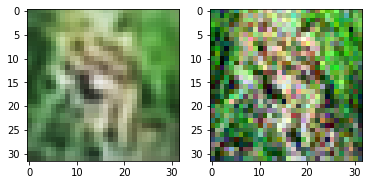

tensor(0.0451)


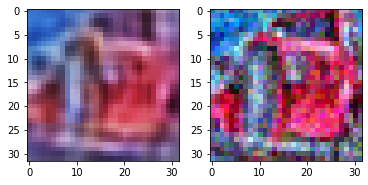

tensor(0.0441)


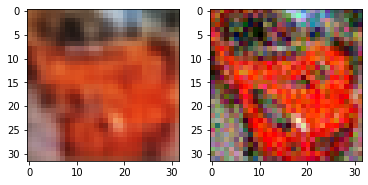

tensor(0.0437)


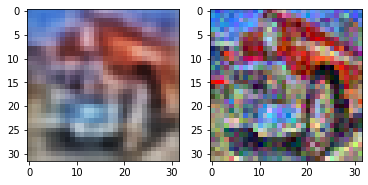

tensor(0.0432)


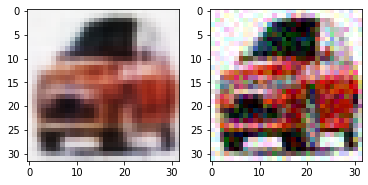

tensor(0.0425)


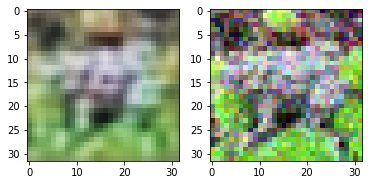

tensor(0.0423)


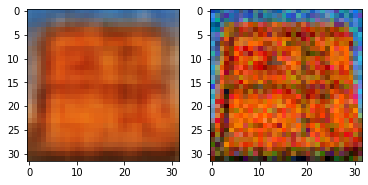

tensor(0.0422)


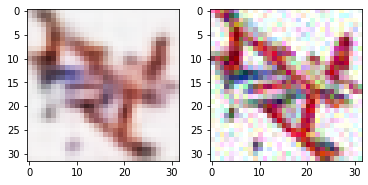

tensor(0.0414)


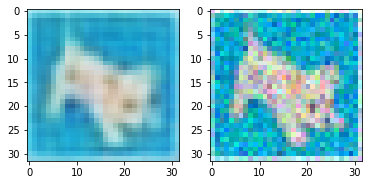

tensor(0.0412)


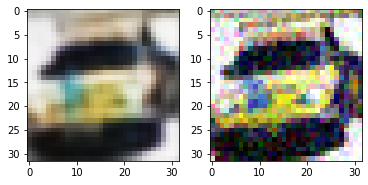

tensor(0.0410)


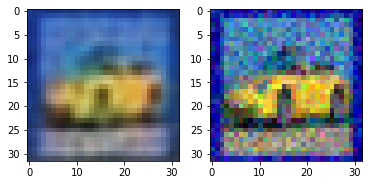

tensor(0.0409)


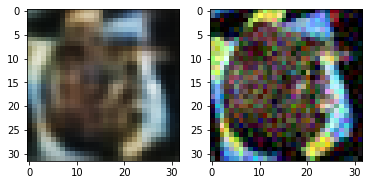

tensor(0.0409)


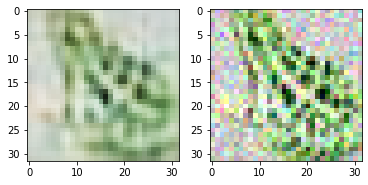

tensor(0.0404)


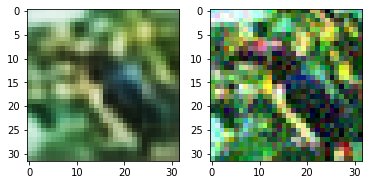

In [141]:
a = sorted(arr, key = lambda tup: tup[0], reverse=True)[:30]
print([error for (error,recon,test) in a])
for (error,recon,test) in a:
    print(error)
    plt.subplot(121)
    imshow(torchvision.utils.make_grid(recon))
    plt.subplot(122)
    imshow(torchvision.utils.make_grid(test))
    plt.show()